<a href="https://colab.research.google.com/github/WilliamShengYangHuang/CycleGAN/blob/main/Wolfram_Cellular_Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stephen Wolfram's Cellular Automata (CA)**

A New Kind of Science (online): https://www.wolframscience.com/nks/

last modified on 29 December by William Huang (ucfnhua@ucl.ac.uk)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
#%matplotlib inline

In [2]:
u = np.array([[4], [2], [1]]) # We will use the vector to obtain numbers written in binary representation

## Compute a single state of the elementary CA

In [3]:
def step(x, rule_b):
    # The columns contains the L(left), C(center), R(right) values of all cells.
    y = np.vstack((np.roll(x, 1), x, np.roll(x, -1))).astype(np.int8) # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8) # We get the patterns given by the rule.
    #print('y:' + y)
    #print('z:' + z)
    return rule_b[7 - z]

## Simulate an elementary CA given its rule (0, 255)

In [4]:
SIZE = 64 #@param{type:"slider", min:1, max:512, step:1}

In [5]:
def generate(rule, size=SIZE, steps=SIZE):
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)], dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8) # Random initial state.
    x[0, :] = np.random.rand(size) < .5 # Apply the step function iteratively.
    
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  after removing the cwd from sys.path.


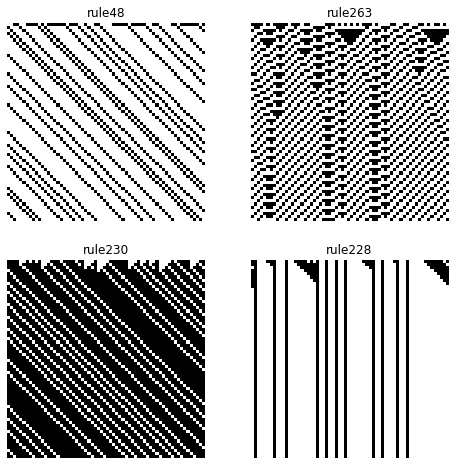

In [6]:
raw = 2 #@param {type:"slider", min:1, max:8, step:1}
column = 2 #@param {type:"slider", min:1, max:8, step:1}
fig, axes = plt.subplots(raw, column, figsize=(8, 8))
rules = []
for i in range(raw*column):
  rules.append(random.randint(1, 300))
#rules = [3, 18, 30, 90, 106, 110, 158, 154, 184]
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, interpolation='none',
              cmap=plt.cm.binary)
    ax.set_axis_off()
    ax.set_title('rule' + str(rule))